In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract
pytesseract.pytesseract.tesseract_cmd="C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
!pip install opencv-python
import cv2
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install Pillow
!pip install pdf2image
import os    
from PIL import Image
from pdf2image import convert_from_path

'sudo' is not recognized as an internal or external command,
operable program or batch file.


# reading pdf file from path in jupyter notebook and converting it to image

In [2]:
images=convert_from_path("table.pdf")

# Printing text extracted from pdf converted to image

In [3]:
for count, img in enumerate(images):
    img_name = f"page_{count}.png"  
    img.save(img_name, "png")

png_files = [f for f in os.listdir(".") if f.endswith(".png")]

for png_file in png_files:
    extracted_text = pytesseract.image_to_string(Image.open(png_file))
    print(extracted_text)


NATIONAL PARTNERSHIP FOR QUALITY AFTERSCHOOL LEARNING
www.sedl.org/afterschool/toolkits

AFTERSCHOOL TRAINING TOOLKIT

Tutoring to Enhance Science Skills
Tutoring Two: Learning to Make Data Tables

Sample Data for Data Tables

Use these data to create data tables following the Guidelines for Making a Data Table and
Checklist for a Data Table.

Example 1: Pet Survey (GR 2-3)
Ms. Hubert’s afterschool students took a survey of the 600 students at Morales Elementary
School. Students were asked to select their favorite pet from a list of eight animals. Here
are the results.

Lizard 25, Dog 250, Cat 115, Bird 50, Guinea pig 30, Hamster 45, Fish 75,

Ferret 10

Example 2: Electromagnets—Increasing Coils (GR 3-5)

The following data were collected using an electromagnet with a 1.5 volt battery, a switch,
a piece of #20 insulated wire, and a nail. Three trials were run. Safety precautions in
repeating this experiment include using safety goggles or safety spectacles and avoiding
short circuits.

# reading images from pc path

In [4]:
img1=cv2.imread("C:\\Users\\USER\\Downloads\\Data\\Data\\Task1\\1.jpg")
img2=cv2.imread("C:\\Users\\USER\\Downloads\\Data\\Data\\Task1\\2.jpg")
img3=cv2.imread("C:\\Users\\USER\\Downloads\\Data\\Data\\Task1\\3.jpg")

# Creating a function to display the images in current jupyter notebook console

In [5]:
def display(im_path):
    dpi=80
    im_data=plt.imread(im_path)
    height,width,depth=im_data.shape
    
    figsize=width/float(dpi), height/float(dpi)
    
    fig=plt.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    
    ax.axis('off')
    
    ax.imshow(im_data, cmap='gray')
    
    plt.show()

# Creating images in the current directory using image paths

In [6]:
cv2.imwrite("image1.jpg", img1)
cv2.imwrite("image2.jpg", img2)
cv2.imwrite("image3.jpg", img3)


True

# Image preprocessing and printing the text extracted

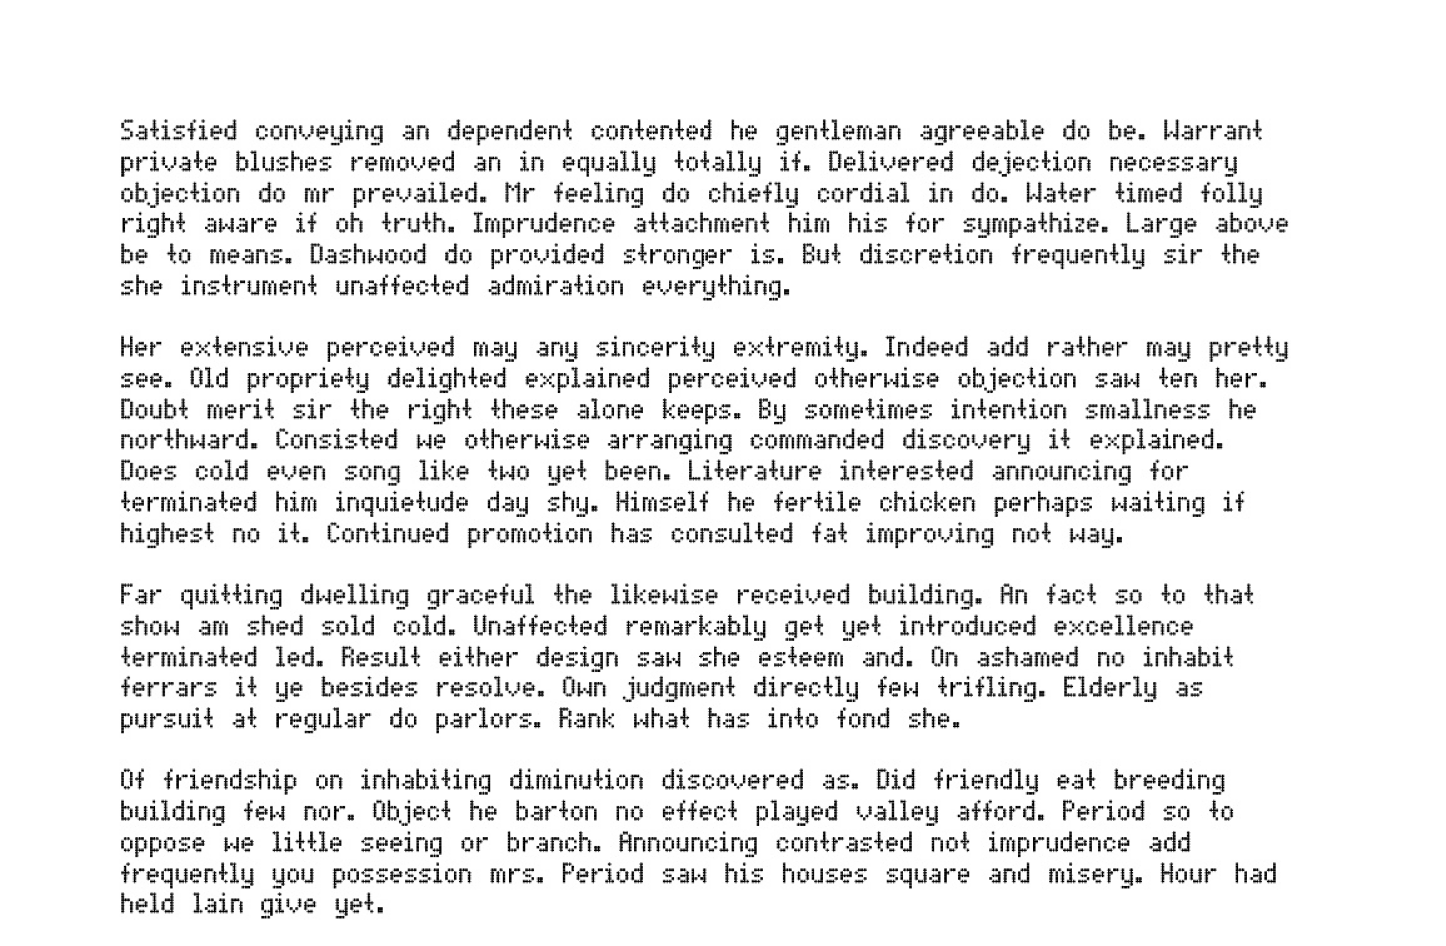

Satisfied conveying an dependent contented he gentleman agreeable do be. Warrant
private blushes removed an in equally totally if. Delivered dejection necessary
objection do mr prevailed. Mr feeling do chiefly cordial in do. Water timed folly
right aware if oh truth. Imprudence attachment him his for sympathize. Large above
be to means. Dashwood do provided stronger is. But discretion frequently sir the
she instrument unaffected admiration everything.

Her extensive perceived may any sincerity extremity. Indeed add rather may pretty
see. Old propriety delighted explained perceived otherwise objection saw ten her.
Doubt merit sir the right these alone keeps. By sometimes intention smallness he
northward. Consisted we otherwise arranging commanded discovery it explained.
Does cold even song like two yet been. Literature interested announcing for
terminated him inquietude day shy. Himself he fertile chicken perhaps waiting if
highest no it. Continued promotion has consulted fat improving 

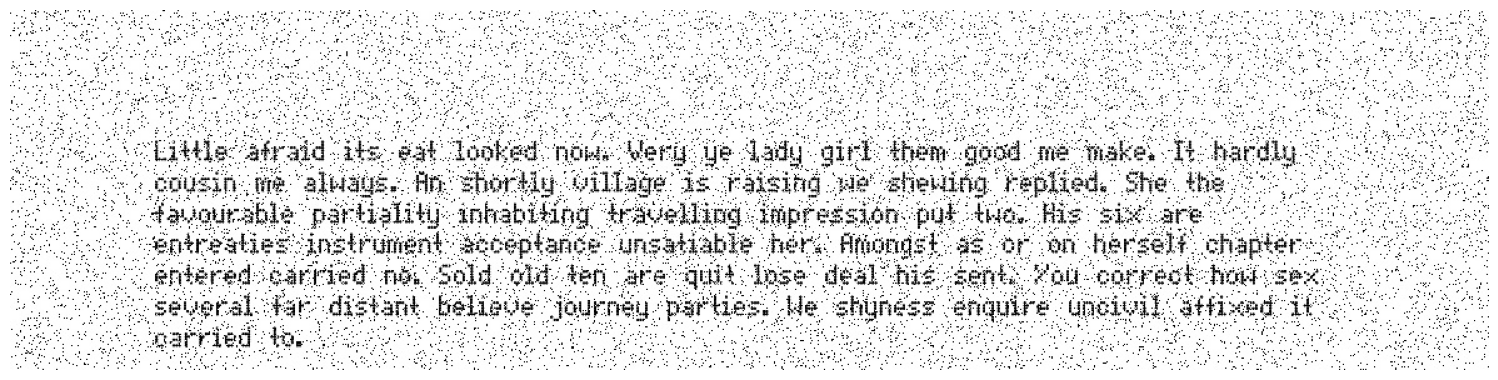

Little afraid its eat looked now. Very ye lady girl them good me make. It hardly
cousin me always. fin shortiy village is raising we shewing replied. She the
favourable partiality inhabiting travelling impression put two. His six are
entreaties instrument acceptance unsatiable her. Amongst as or on herself chapter
entered carried no. Sold old ten are quit lose deal his sent. You correct how sex
several far distant believe journey parties. We shynesz enquire uncivil affixed it
carried to.



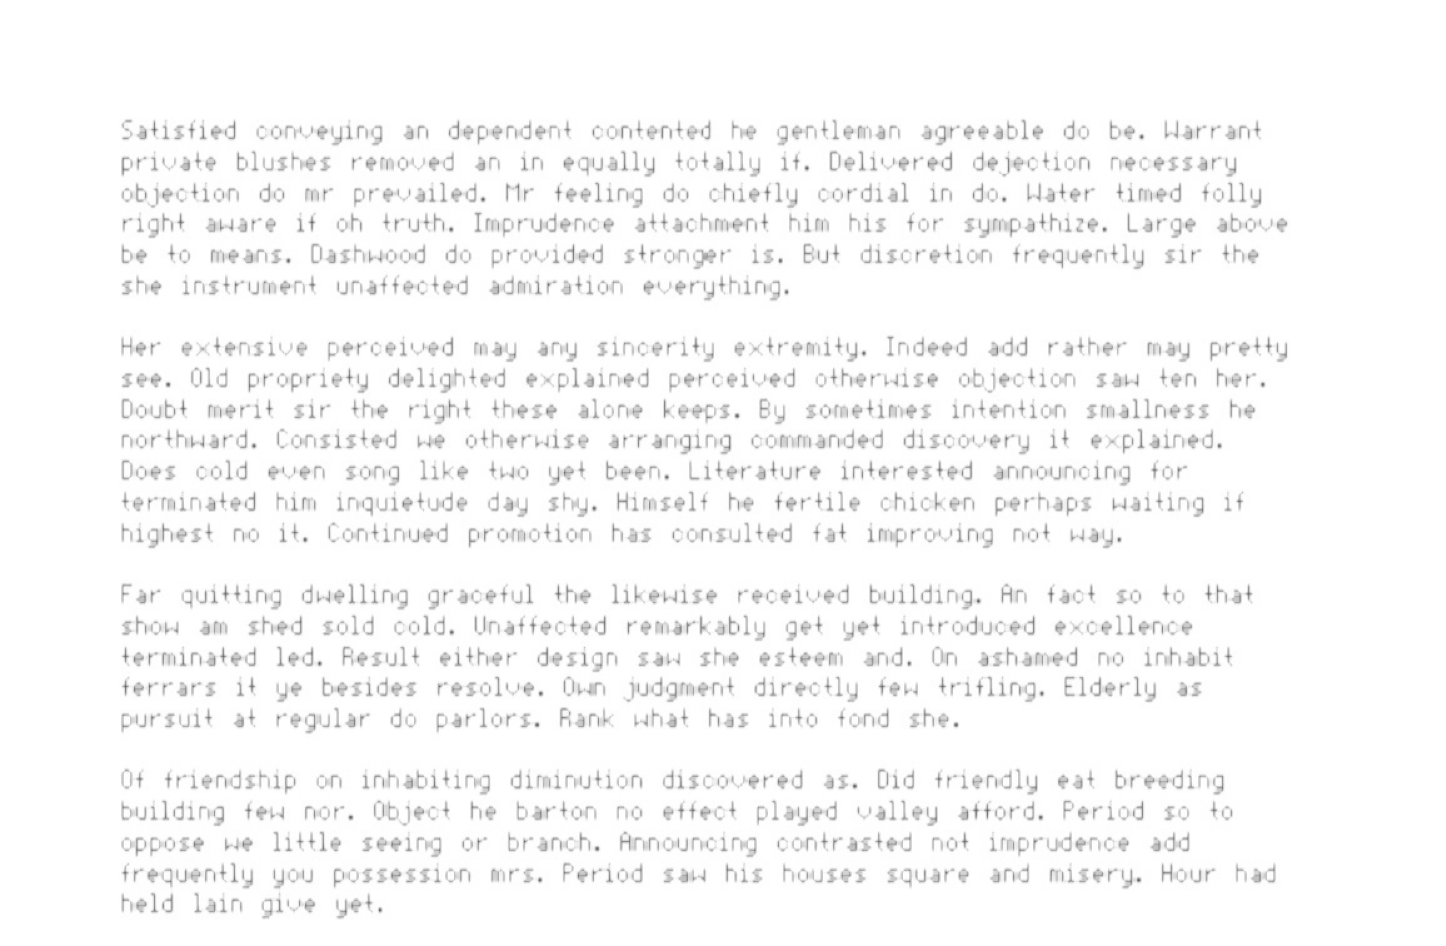

Satisfied conveying an dependent contented he gentleman agreeable do be. Warrant
private blushes removed an in equally totally if. Delivered dejection necessary
objection do wr prevailed. tr feeling do chiefly cordial in do. Water timed folly
right aware if oh truth, Imprudence attachment him his for sympathize. Large above
be to means. Dashwood do provided stronger is. But discretion frequently sir the
she instrument unaffected admiration everything.

Her extensive perceived may any sincerity extremity. Indeed add rather may pretty
see. Old propriety delighted expleined perceived otherndse objection saa ten her.
Doubt merit sir the right these alone keeps. By sometimes intention smallness he
northesard. Consisted we otherwise arranging commanded discovery 14 explained.
Does cold even song like two yet been. Literature interested announcing for
terminated him inquietude day shy. Himself he fertile chicken perhaps malting if
highest mo it. Continued promotion has consulted fat improving

In [7]:
count=0
img=[img1,img2,img3]
#running a loop for image preprocessing and printing text extracted for each image in the data folder
for im in img:
    # 1. binarization = making the image black and white
    def grayscale(image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image=grayscale(im)
    thresh, im_bw=cv2.threshold(gray_image, 240, 255, cv2.THRESH_BINARY)
    # 2. noise removal
    def noise_removal(image):
        import numpy as np
        kernel=np.ones((1,1), np.uint8)
        image=cv2.dilate(image, kernel, iterations=1)
        kernel=np.ones((1,1), np.uint8)
        image=cv2.erode(image, kernel, iterations=1)
        image=cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
        image=cv2.medianBlur(image, 3)
        return(image)
    no_noise=noise_removal(im_bw)
    # 3. dilation of the noise removed image to thicken the fonts
    def thick_font(image):
        import numpy as np
        image=cv2.bitwise_not(image)
        kernel=np.ones((2,2), np.uint8)
        image=cv2.dilate(image, kernel, iterations=1)
        image=cv2.bitwise_not(image)
        return(image)
    dilated_image=thick_font(no_noise)
    cv2.imwrite("dilated_image.jpg", dilated_image)
    imaage=cv2.imread("dilated_image.jpg")
    text=pytesseract.image_to_string(imaage)
    # 4. display the image before printing the text extracted
    if count==0:
        display("image1.jpg")
    elif count==1:
        display("image2.jpg")
    else:
        display("image3.jpg")
    count=count+1
    # 5. display the text extracted
    print(text)
    